# KNN Model Implementation

In [ ]:
import numpy as np

class KNN:
    def __init__(self, k=5, task='classification'):
        self.k = k
        self.task = task

    def fit(self, X_train, y_train): #training function
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test): #predict function
        predictions = [self.calculate_prediction(x) for x in X_test]
        return np.array(predictions)

    def calculate_prediction(self, x):
        # Compute distances between x and all examples in the training set
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        if self.task == 'classification':
           # Return the most common class label
            unique, counts = np.unique(k_nearest_labels, return_counts=True)
            return unique[np.argmax(counts)]

        elif self.task == 'regression':
            # Return the mean of the k nearest labels
            return np.mean(k_nearest_labels)

        else:
            raise ValueError("Task must be either 'classification' or 'regression'")

#Import Data for Classification - Wine Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# URL to the Wine dataset in CSV format
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Column names as per the dataset description
columns = [
    'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 'Magnesium',
    'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
    'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline'
]

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url, header=None, names=['Class'] + columns)

# Separate features and labels
X = df[columns].values
y = df['Class'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing features shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (142, 13)
Training labels shape: (142,)
Testing features shape: (36, 13)
Testing labels shape: (36,)


#Test Model Implementation - Classification

In [ ]:
knn = KNN(k=3, task='classification')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)



In [ ]:
# Calculate accuracy

from sklearn.metrics import accuracy_score
accuracy_custom = accuracy_score(y_test, y_pred)
print("Custom Accuracy:", accuracy_custom)

Custom Accuracy: 0.8055555555555556


#Sklearn Implementation - Classification

In [ ]:
# Create and train the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred)
print("Sklearn Accuracy:", accuracy_sklearn)

Sklearn Accuracy: 0.7222222222222222


# Compare Custom and Sklearn - Classification

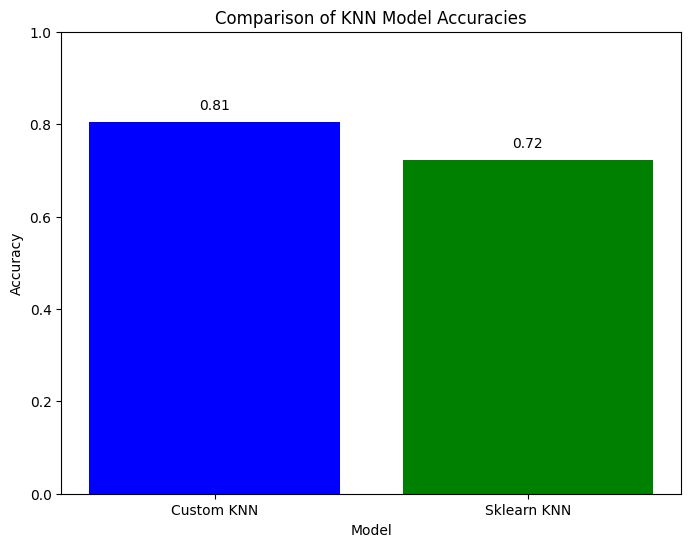

In [ ]:
import matplotlib.pyplot as plt

# Visualize the accuracy scores
labels = ['Custom KNN', 'Sklearn KNN']
accuracies = [accuracy_custom, accuracy_sklearn]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of KNN Model Accuracies')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()

#Import Data for Regression - Auto MPG dataset

In [ ]:
# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv(url, names=columns, delim_whitespace=True, na_values='?', comment='\t')

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features and labels
X = df.drop(columns=['mpg', 'car name']).values
y = df['mpg'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Test Model Implementation - Regression

In [ ]:
# Create and train the custom KNN model
custom_knn = KNN(k=5, task='regression')
custom_knn.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error

# Make predictions and calculate MSE for the custom KNN model
y_pred_custom = custom_knn.predict(X_test)
mse_custom = mean_squared_error(y_test, y_pred_custom)

#Sklearn Implementation - Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create and train the sklearn KNN model
sklearn_knn = KNeighborsRegressor(n_neighbors=5)
sklearn_knn.fit(X_train, y_train)

# Make predictions and calculate MSE for the sklearn KNN model
y_pred_sklearn = sklearn_knn.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)


#Compare Custom and Sklearn - Regression

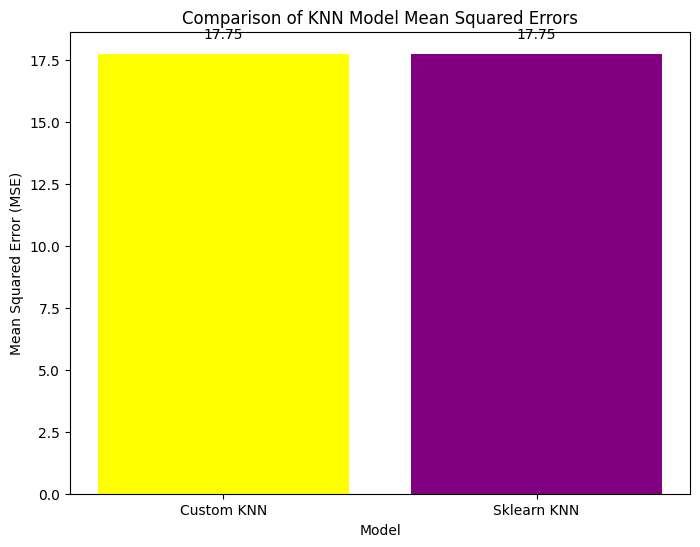

Custom KNN MSE: 17.752617721518984
Sklearn KNN MSE: 17.752617721518984


In [ ]:
# Visualize the results
labels = ['Custom KNN', 'Sklearn KNN']
mse_values = [mse_custom, mse_sklearn]

plt.figure(figsize=(8, 6))
plt.bar(labels, mse_values, color=['yellow', 'purple'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of KNN Model Mean Squared Errors')
for i, v in enumerate(mse_values):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', va='bottom')
plt.show()

print("Custom KNN MSE:", mse_custom)
print("Sklearn KNN MSE:", mse_sklearn)